# Imports libraries

In [30]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load Data

In [4]:
df = pd.read_csv("Customer_Segmentation_py.csv")  
df.head()

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,26/11/2013,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
1,26/11/2015,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
2,23/03/2014,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401
3,23/03/2016,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088
4,15/05/2014,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418


In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113036 entries, 0 to 113035
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Date              113036 non-null  object
 1   Day               113036 non-null  int64 
 2   Month             113036 non-null  object
 3   Year              113036 non-null  int64 
 4   Customer_Age      113036 non-null  int64 
 5   Age_Group         113036 non-null  object
 6   Customer_Gender   113036 non-null  object
 7   Country           113036 non-null  object
 8   State             113036 non-null  object
 9   Product_Category  113036 non-null  object
 10  Sub_Category      113036 non-null  object
 11  Product           113036 non-null  object
 12  Order_Quantity    113036 non-null  int64 
 13  Unit_Cost         113036 non-null  int64 
 14  Unit_Price        113036 non-null  int64 
 15  Profit            113036 non-null  int64 
 16  Cost              113036 non-null  int

In [8]:
df.describe()

,Day,Year,Customer_Age,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
count,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000
mean,15.665753,2014.401739,35.919212,11.901660,267.296366,452.938427,285.051665,469.318695,754.370360
std,8.781567,1.272510,11.021936,9.561857,549.835483,922.071219,453.887443,884.866118,1309.094674
min,1.000000,2011.000000,17.000000,1.000000,1.000000,2.000000,-30.000000,1.000000,2.000000
25%,8.000000,2013.000000,28.000000,2.000000,2.000000,5.000000,29.000000,28.000000,63.000000
50%,16.000000,2014.000000,35.000000,10.000000,9.000000,24.000000,101.000000,108.000000,223.000000
75%,23.000000,2016.000000,43.000000,20.000000,42.000000,70.000000,358.000000,432.000000,800.000000
max,31.000000,2016.000000,87.000000,32.000000,2171.000000,3578.000000,15096.000000,42978.000000,58074.000000


# The statistics says:
- Customer_Age: Average customer is about 36 years old, with most between 28 and 43.
- Order_Quantity: Most orders are small; median is 10 units, but max goes up to 32.
- Unit_Cost vs Unit_Price: Median cost is 9 while median price is 24, suggesting a markup.
- Profit: Median profit per transaction is 101, but maximum profit reaches 15,096 — indicating some very large or expensive orders.
- Cost and Revenue: Revenue is generally higher than cost, as expected. The maximum revenue recorded is 58,074.

In [7]:
print(df.isnull().sum())

Date                0
Day                 0
Month               0
Year                0
Customer_Age        0
Age_Group           0
Customer_Gender     0
Country             0
State               0
Product_Category    0
Sub_Category        0
Product             0
Order_Quantity      0
Unit_Cost           0
Unit_Price          0
Profit              0
Cost                0
Revenue             0
dtype: int64


In [29]:
# there is no missing value in the dataset

# Perform Exploratory Data Analysis (EDA)

### Distribution of customers across Age_Group

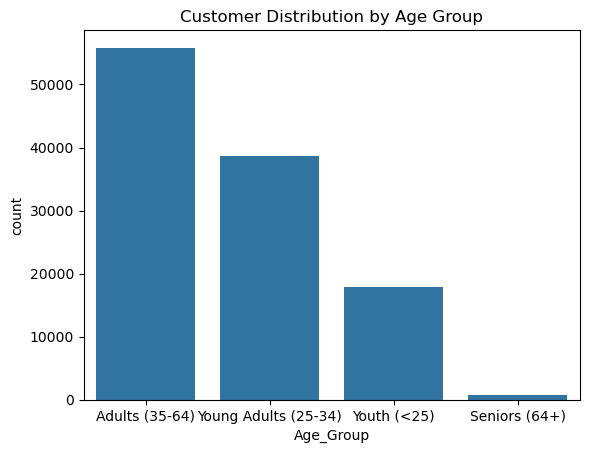

In [9]:
sns.countplot(x='Age_Group', data=df, order=df['Age_Group'].value_counts().index)
plt.title("Customer Distribution by Age Group")
plt.show()

It shows:
- The target market is clearly dominated by Adults and Young Adults — together they make up the vast majority of customers.
- Seniors are an untapped or underserved segment — either because the products/services aren’t appealing to them or they are harder to reach.
- Youth have a decent presence but significantly less than the top two categories.

### Gender distribution by country/state

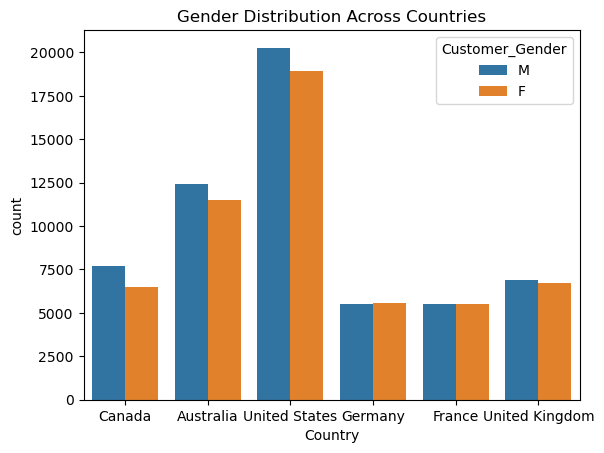

In [10]:
sns.countplot(x='Country', hue='Customer_Gender', data=df)
plt.title("Gender Distribution Across Countries")
plt.show()


It highlights that:
- The United States dominates in customer volume for both genders.
- Gender distribution is fairly balanced across most countries, with only small variations.
- Canada and Australia show a more noticeable male majority.
- Germany, France, and the UK have near equal male-to-female ratios.

### Most popular product category/sub-category

In [12]:
top_category = df.groupby("Product_Category")["Order_Quantity"].sum().sort_values(ascending=False)
print(top_category.head())

Product_Category
Accessories    1054162
Clothing        254743
Bikes            36411
Name: Order_Quantity, dtype: int64


It indicates that:
- Accessories dominate the sales volume, making up the majority of orders.
- Clothing has a strong but much smaller share compared to accessories.
- Bikes are a niche segment — either high-value but low-volume items, or low overall demand.

In [13]:
top_subcategory = df.groupby("Sub_Category")["Order_Quantity"].sum().sort_values(ascending=False)
print(top_subcategory.head())

Sub_Category
Tires and Tubes      514051
Bottles and Cages    241726
Helmets              181606
Jerseys               88125
Caps                  67268
Name: Order_Quantity, dtype: int64


The values provide info on:
- Tires and Tubes dominate — likely due to being a repeat purchase necessity.
- Bottles and Cages and Helmets also perform well, showing high accessory demand.-
- Clothing items (Jerseys, Caps) make up a smaller share but still contribute meaningful volume.
- These top 5 sub-categories are all from Accessories and Clothing — not Bikes.

# Clustering for Segmentation

In [16]:
X = df[['Order_Quantity', 'Profit', 'Revenue']]
X_scaled = StandardScaler().fit_transform(X)

# apply k-means
kmeans = KMeans(n_clusters=4, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

print(df.groupby('Cluster')[['Order_Quantity', 'Profit', 'Revenue']].mean())


         Order_Quantity       Profit      Revenue
Cluster                                          
0              3.288800   156.712052   480.622125
1              1.760811  1267.763683  3667.860938
2             14.183613   108.085128   222.410239
3             24.996953   229.514407   457.828610


| Cluster | Description                                         |
| ------- | --------------------------------------------------- |
| 0       | Regular Shoppers (small orders, moderate spend)     |
| 1       | Premium Buyers (small orders, high spend)           |
| 2       | Budget Bulk Buyers (large orders, low value)        |
| 3       | High-Volume Buyers (largest orders, moderate value) |


## Profitability and Revenue Analysis

In [17]:
# Top categories by profit and revenue
profit_by_cat = df.groupby('Product_Category')['Profit'].sum().sort_values(ascending=False)
revenue_by_cat = df.groupby('Product_Category')['Revenue'].sum().sort_values(ascending=False)

print(profit_by_cat)
print(revenue_by_cat)

Product_Category
Bikes          20519276
Accessories     8862377
Clothing        2839447
Name: Profit, dtype: int64
Product_Category
Bikes          61782134
Accessories    15117992
Clothing        8370882
Name: Revenue, dtype: int64


This indicates that:
- Bikes dominate in both revenue and profit, even though earlier data showed they had low order quantity compared to accessories.
   This indicates bikes are high-value items with high profit margins.

- Accessories sell in huge quantities (as we saw earlier) but contribute less profit per unit.
   They may act as complementary products to boost bike sales.

- Clothing has the smallest share of both revenue and profit.
   It could be a niche or secondary product line.

## Demographic Insights

In [18]:
# Age group contributions
age_rev = df.groupby('Age_Group')['Revenue'].sum()
age_profit = df.groupby('Age_Group')['Profit'].sum()

# Gender spending differences
gender_rev = df.groupby('Customer_Gender')['Revenue'].mean()


C:\Users\Shadia\AppData\Local\Temp\ipykernel_32\1500853397.py:3: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Date'] = pd.to_datetime(df['Date'])


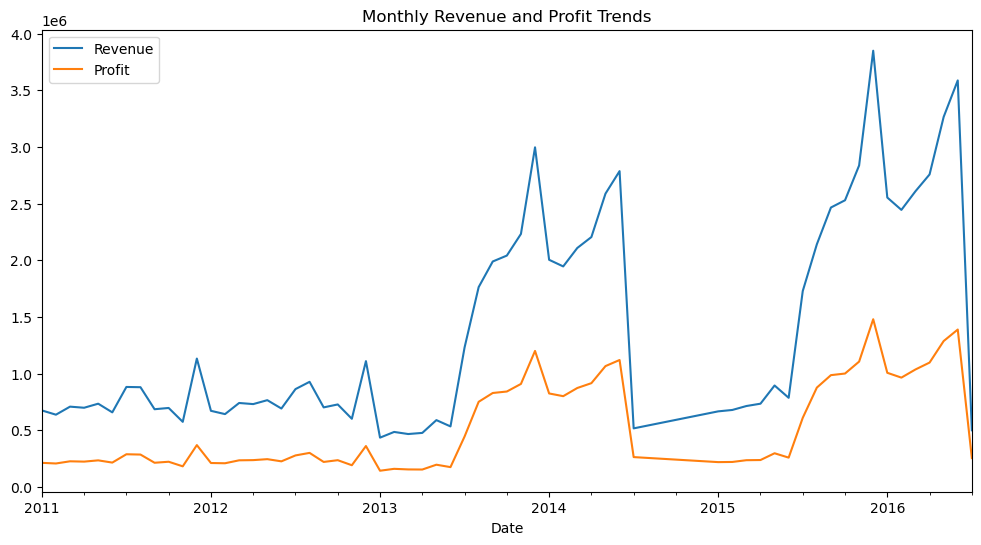

In [20]:
# time series analysis

df['Date'] = pd.to_datetime(df['Date'])
monthly = df.groupby(df['Date'].dt.to_period('M'))[['Revenue', 'Profit']].sum()

monthly.plot(kind='line', figsize=(12,6))
plt.title("Monthly Revenue and Profit Trends")
plt.show()


From the time series analysis we can say that with the time revenue is increasing more than profit

# Model Building

In [21]:
# Classification: Predict high order quantity

df['High_Order'] = (df['Order_Quantity'] > df['Order_Quantity'].median()).astype(int)

features = ['Customer_Gender', 'Age_Group', 'Product_Category', 'Unit_Cost', 'Unit_Price']
df_encoded = pd.get_dummies(df[features], drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(df_encoded, df['High_Order'], test_size=0.2, random_state=42)

clf = RandomForestClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.7354476291578202
              precision    recall  f1-score   support

           0       0.99      0.48      0.65     11389
           1       0.65      0.99      0.79     11219

    accuracy                           0.74     22608
   macro avg       0.82      0.74      0.72     22608
weighted avg       0.82      0.74      0.72     22608



In [28]:
# Regression: Predict profit

y = df['Profit']
X = df_encoded

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

reg = RandomForestRegressor()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)

print("RMSE:", mean_squared_error(y_test, y_pred))

RMSE: 71605.60174603265


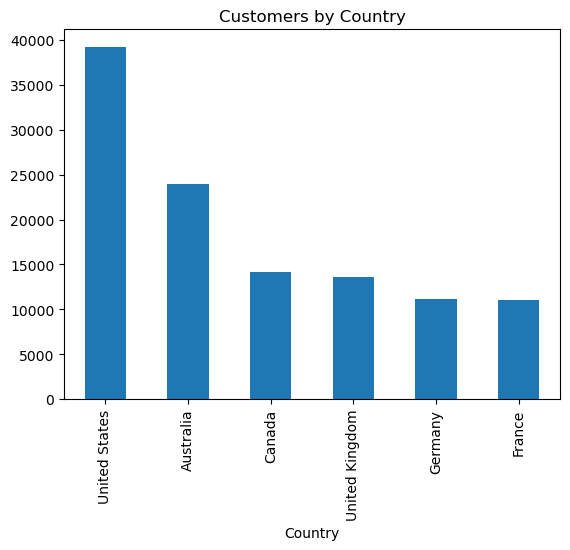

In [24]:
# Customer distribution by country
df['Country'].value_counts().plot(kind='bar')
plt.title("Customers by Country")
plt.show()


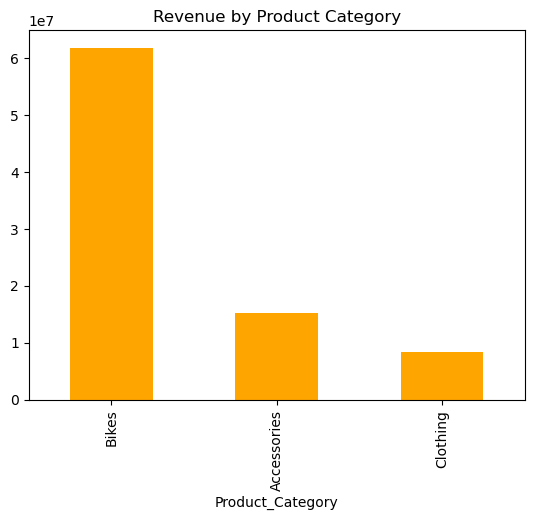

In [26]:
# Revenue by category

revenue_by_cat.plot(kind='bar', color='orange')
plt.title("Revenue by Product Category")
plt.show()


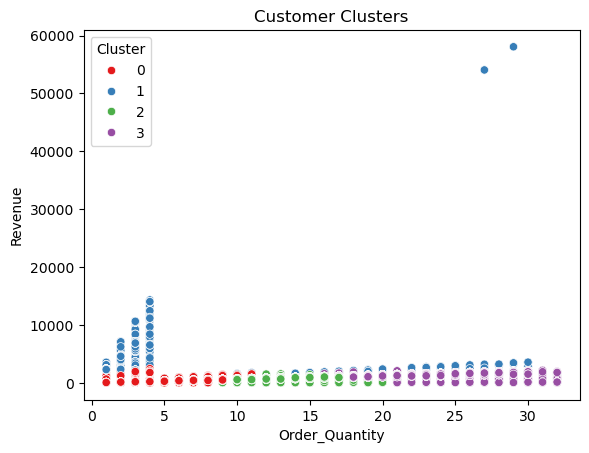

In [27]:
# Cluster visualization
sns.scatterplot(x='Order_Quantity', y='Revenue', hue='Cluster', data=df, palette='Set1')
plt.title("Customer Clusters")
plt.show()
